In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root='../Data/', train=True, download=True, transform=transform)

In [6]:
test_data = datasets.MNIST(root='../Data/', train=False, download=True, transform=transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data/
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [11]:
image, label = train_data[0]

In [12]:
# it is a gray scale image, so the first element is 1
image.shape

torch.Size([1, 28, 28])

In [13]:
label

5

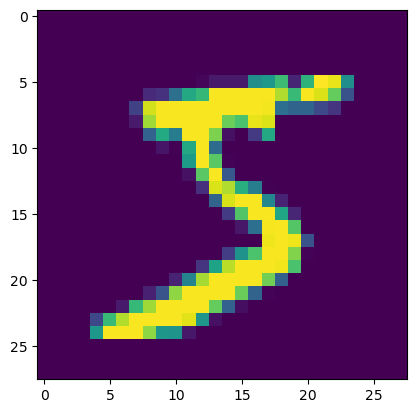

In [14]:
# The default color is viridis, but it is still gray-scale image. You can set the cmap as 'gray' in imshow to check.
plt.imshow(image.reshape((28, 28)))

In [15]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [16]:
from torchvision.utils import make_grid

In [17]:
# The following help to get the First batch only

for images, labels in train_loader:
    # 60,000/100 60 times
    break

In [18]:
images.shape
# image number, gray-scale, 28 pix, 28 pix

torch.Size([100, 1, 28, 28])

In [19]:
labels.shape

torch.Size([100])

In [20]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

Labels:  [7 2 3 5 8 5 3 6 9 9 1 3]


Labels:  [7 2 3 5 8 5 3 6 9 9 1 3]


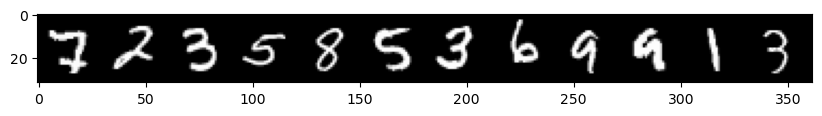

In [21]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [22]:
class MultilayerPerceptron(nn.Module):

    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):

        super().__init__()

        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)

    def forward(self, X):

        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1)  # for Multi class classification

In [23]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
# Check how many parameters in each step
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [26]:
images.shape
# we want to transform the last three dimensions into 1D since only one color and we are using artificial nn here.

torch.Size([100, 1, 28, 28])

In [27]:
images.view(100, -1).shape

torch.Size([100, 784])

In [28]:
import time
start_time = time.time()

# training

epochs = 20

# Just for trackers, not reallly needed for training
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):

    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):

        b += 1

        y_pred = model(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        # print(y_pred.data)
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%200 == 0:
            acc = train_corr.item()*100/(100*b)
            print(f'Epoch {i}  batch{b} loss:{loss.item()} accuracy: {acc}')

    train_losses.append(loss)
    train_correct.append(train_corr)

    with torch.no_grad():

        for b, (X_test, y_test) in enumerate(test_loader):

            y_val = model(X_test.view(500, -1))

            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test_corr)


total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

Epoch 0  batch200 loss:0.23562385141849518 accuracy: 83.245
Epoch 0  batch400 loss:0.3533070683479309 accuracy: 87.5325
Epoch 0  batch600 loss:0.13734401762485504 accuracy: 89.58166666666666
Epoch 1  batch200 loss:0.24684999883174896 accuracy: 94.87
Epoch 1  batch400 loss:0.14273890852928162 accuracy: 95.085
Epoch 1  batch600 loss:0.0733654722571373 accuracy: 95.355
Epoch 2  batch200 loss:0.08371471613645554 accuracy: 96.515
Epoch 2  batch400 loss:0.06312298774719238 accuracy: 96.6075
Epoch 2  batch600 loss:0.06180889904499054 accuracy: 96.695
Epoch 3  batch200 loss:0.11615169793367386 accuracy: 97.625
Epoch 3  batch400 loss:0.05801045894622803 accuracy: 97.4675
Epoch 3  batch600 loss:0.03130992129445076 accuracy: 97.49
Epoch 4  batch200 loss:0.10859694331884384 accuracy: 98.14
Epoch 4  batch400 loss:0.04483110085129738 accuracy: 97.9725
Epoch 4  batch600 loss:0.055878061801195145 accuracy: 97.985
Epoch 5  batch200 loss:0.008043684996664524 accuracy: 98.36
Epoch 5  batch400 loss:0.0389

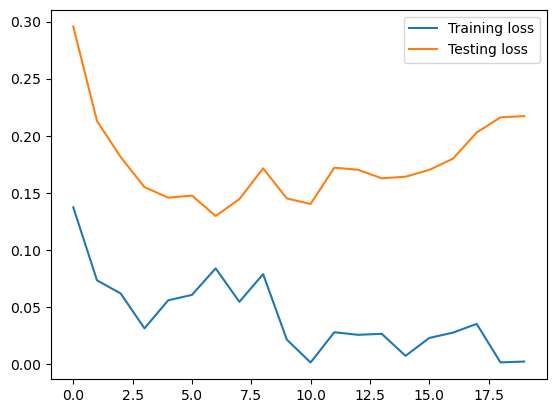

In [29]:
# Convert list of tensors to a list of NumPy arrays
train_losses = [loss.detach().cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in train_losses]
test_losses = [loss.detach().cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in test_losses]
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Testing loss')
plt.legend()

##### It is overfitting after epoch 10.

In [30]:
train_acc = [t/600 for t in train_correct]
train_acc

[tensor(89.5817),
 tensor(95.3550),
 tensor(96.6950),
 tensor(97.4900),
 tensor(97.9850),
 tensor(98.4000),
 tensor(98.6750),
 tensor(98.9150),
 tensor(99.1233),
 tensor(99.2750),
 tensor(99.3267),
 tensor(99.4483),
 tensor(99.5917),
 tensor(99.5600),
 tensor(99.6333),
 tensor(99.6217),
 tensor(99.6417),
 tensor(99.6383),
 tensor(99.7400),
 tensor(99.6517)]

In [31]:
test_acc = [t/100 for t in test_correct]
test_acc

[tensor(94.3600),
 tensor(95.8000),
 tensor(96.9000),
 tensor(97.2100),
 tensor(97.5800),
 tensor(97.6100),
 tensor(97.7700),
 tensor(97.6000),
 tensor(97.6400),
 tensor(97.7400),
 tensor(97.6800),
 tensor(97.6000),
 tensor(97.7200),
 tensor(97.8700),
 tensor(97.6500),
 tensor(97.5800),
 tensor(97.2700),
 tensor(97.7400),
 tensor(97.5000),
 tensor(97.7800)]

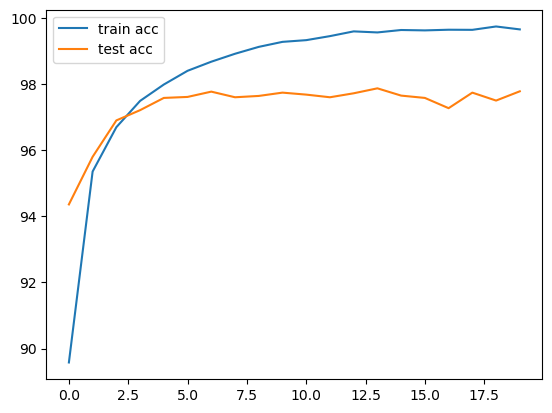

In [32]:
plt.plot(train_acc, label='train acc')
plt.plot(test_acc, label='test acc')
plt.legend()

In [33]:
# New unseen data

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [34]:
with torch.no_grad():
    correct = 0

    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()


In [35]:
100 * correct.item()/len(test_data)

97.78

In [36]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 972,    0,    4,    0,    0,    3,   11,    0,    7,    4],
       [   0, 1124,    0,    0,    0,    0,    3,    4,    0,    2],
       [   0,    5, 1010,    3,    5,    0,    3,   13,    3,    0],
       [   0,    1,    3,  982,    0,   13,    1,    1,    5,    5],
       [   1,    0,    2,    0,  954,    3,    2,    1,    1,    5],
       [   0,    0,    0,    7,    0,  868,    6,    1,    2,    2],
       [   1,    1,    0,    0,    4,    1,  931,    0,    1,    0],
       [   1,    1,    4,    6,    2,    1,    0, 1002,    4,    0],
       [   3,    3,    9,    6,    1,    2,    1,    1,  949,    5],
       [   2,    0,    0,    6,   16,    1,    0,    5,    2,  986]],
      dtype=int64)